In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import requests
import json
from citipy import citipy
from config import api_key

url = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
# Random City selection of 500+ cities using citypy (not repeated)
city_set = []
while len(city_set) <=700:
    r_lat = round(np.random.random()*90,2)*(np.random.randint(0,2)*2 - 1)
    r_lon = round(np.random.random()*180,2)*(np.random.randint(0,2)*2 - 1)
    city = citipy.nearest_city(r_lat, r_lon)
    if not([city.city_name, city.country_code] in city_set):
        city_set.append([city.city_name, city.country_code])
    print(city.city_name)

# print(f"city_set have {len(city_set)} of unique cities in list")


mataura
vila franca do campo
hobart
kapaa
ancud
cayenne
sinnamary
kapaa
atuona
saskylakh
ribeira grande
san felipe
belushya guba
college
port alfred
uvalde
satitoa
russell
kapaa
garden city
naze
bathsheba
praia da vitoria
dunedin
vytegra
new norfolk
nishihara
butaritari
guerrero negro
busselton
georgetown
punta arenas
illertissen
peace river
gizo
hermanus
busselton
east london
karkaralinsk
hobart
busselton
nemyriv
rikitea
provideniya
atuona
pechora
bluff
amderma
iqaluit
port elizabeth
katsuura
annonay
vaini
bredasdorp
maragogi
morozovsk
mys shmidta
mataura
dikson
atuona
serra
kazalinsk
nikolsk
tabiauea
ushuaia
albany
poum
mataura
rikitea
tiksi
zyryanka
kahului
hithadhoo
cape town
bluff
saleaula
shenjiamen
punta arenas
punta arenas
anloga
avarua
abu dhabi
koila
cape town
outram
lolua
susanville
port macquarie
ushuaia
hithadhoo
kati
ushuaia
hilo
saleaula
louisbourg
kapaa
victoria
provideniya
rikitea
khonuu
nizhneyansk
punta arenas
namibe
atar
ushuaia
ostrovnoy
tautira
jadu
attawapiskat
t

torbay
bedele
amderma
beringovskiy
aksu
olinda
taolanaro
tuktoyaktuk
katsuura
kirovskiy
alice springs
atuona
port moresby
dikson
flin flon
taolanaro
rio brilhante
buala
broken hill
victoria
yumen
husavik
novyy svit
airai
butaritari
port alfred
hasaki
egvekinot
kapaa
jamestown
neiafu
norman wells
yatou
palabuhanratu
motygino
chuy
atuona
ushuaia
busselton
port alfred
bandarbeyla
chuy
barentsburg
pevek
lavrentiya
zholymbet
kapaa
evanston
mataura
ketchikan
svetlogorsk
taolanaro
matara
east london
rikitea
kloulklubed
rikitea
ushuaia
nizhneyansk
victoria
busselton
busselton
faanui
ribeira grande
puerto ayora
xalmimilulco
ushuaia
new norfolk
yunjinghong
khatanga
biak
atuona
nurpur
busselton
punta arenas
bilibino
hithadhoo
busselton
norman wells
pineville
bambous virieux
upernavik
nanortalik
hilo
atuona
atuona
leshukonskoye
bluff
longyearbyen
georgetown
vila velha
cape town
kapaa
namatanai
ushuaia
ushuaia
albany
isangel
bluff
klaksvik
saskylakh
huejuquilla el alto
rikitea
fort saint james
riki

In [4]:
city_weather_set = []
for city in city_set:
    query_url = f"{url}appid={api_key}&q={city[0]}"
    data = requests.get(query_url)
    data_json = data.json()
    if ("main" in data_json.keys()):
        city_weather_set.append(data_json)

In [6]:
city_weather_set[0]["name"]

'Mataura'

In [12]:
# Create a series of scatter plots to showcase
city_name = []
temperature = []
latitude = []
humidity = []
cloudiness = []
wind_speed = []
for i in range(len(city_weather_set)):
    city_name.append(city_weather_set[i]["name"])
    temperature.append(city_weather_set[i]["main"]["temp"])
    latitude.append(city_weather_set[i]["coord"]["lat"])
    humidity.append(city_weather_set[i]["main"]["humidity"])
    cloudiness.append(city_weather_set[i]["clouds"]["all"])
    wind_speed.append(city_weather_set[i]["wind"]["speed"])
weather_df = pd.DataFrame({"city_name":city_name, "latitude": latitude, "temperature":temperature, "humidity":humidity, "cloudiness":cloudiness, "wind_speed":wind_speed})

In [13]:
weather_df

,city_name,latitude,temperature,humidity,cloudiness,wind_speed
0,Mataura,-46.19,282.59,71,95,5.36
1,Vila Franca do Campo,37.72,288.15,77,75,4.10
2,Hobart,-42.88,281.40,93,75,2.60
3,Kapaa,22.08,297.91,61,40,5.10
4,Ancud,-41.87,286.15,66,90,1.00
...,...,...,...,...,...,...
641,Bolobo,-2.17,297.05,83,100,0.90
642,Portobelo,9.55,300.78,79,40,3.60
643,Alta Floresta,-9.88,303.15,70,40,1.50
644,North Bend,43.41,288.74,62,1,8.70


In [19]:
weather_df.to_csv("./Output/weather_500_cities.csv", index=False, encoding="utf-8")

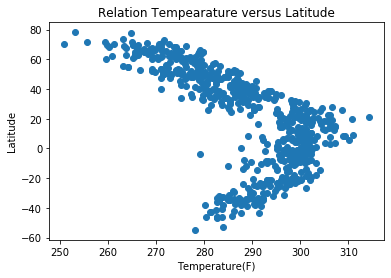

In [20]:
# Series of Scatter plot to show
# Temperature (F) vs. Latitude

plt.scatter(weather_df.temperature, weather_df.latitude)
plt.xlabel("Temperature(F)")
plt.ylabel("Latitude")
plt.title("Relation Tempearature versus Latitude")
plt.savefig("./Output/temperature_latitude.png")
plt.show()

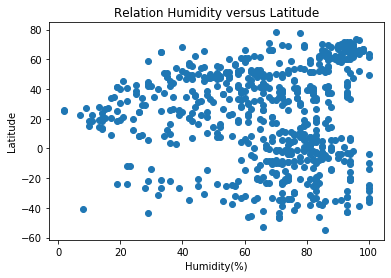

In [21]:
# Series of Scatter plot to show
# Humidity (%) vs. Latitude

plt.scatter(weather_df.humidity, weather_df.latitude)
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.title("Relation Humidity versus Latitude")
plt.savefig("./Output/humidity_latitude.png")
plt.show()

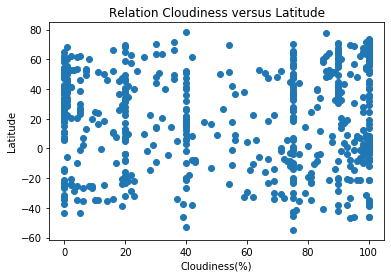

In [22]:
# Series of Scatter plot to show
# Cloudiness (%) vs. Latitude
plt.scatter(weather_df.cloudiness, weather_df.latitude)
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.title("Relation Cloudiness versus Latitude")
plt.savefig("./Output/cloudiness_latitude.png")
plt.show()

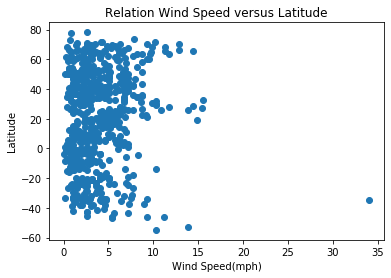

In [23]:
# Series of Scatter plot to show
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_df.wind_speed, weather_df.latitude)
plt.xlabel("Wind Speed(mph)")
plt.ylabel("Latitude")
plt.title("Relation Wind Speed versus Latitude")
plt.savefig("./Output/windspeed_latitude.png")
plt.show()

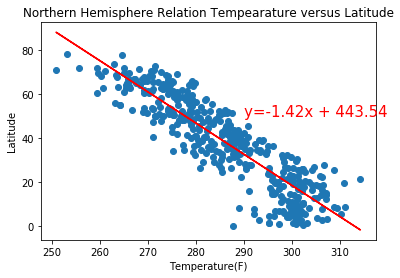

R squre value is 0.79


In [24]:
# Northern Hemisphere - Temperature (F) vs. Latitude
nor_lat = weather_df.loc[weather_df.latitude >= 0]["latitude"]
nor_temp = weather_df.loc[weather_df.latitude >= 0]["temperature"]
plt.scatter(nor_temp, nor_lat)
plt.xlabel("Temperature(F)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Relation Tempearature versus Latitude")


[slope, intercept, r_value, p_value, std_err] = st.linregress(nor_temp, nor_lat)
ligress_value = nor_temp * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(nor_temp, ligress_value, "r-")
plt.annotate(str_eq, (290, 50), color="red", fontsize="15" )
plt.savefig("./Output/northern_temperature_latitude.png")
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

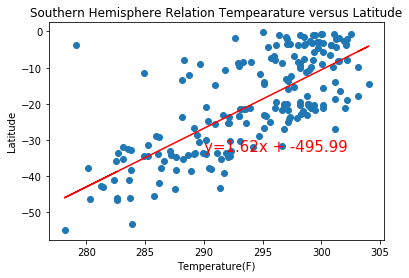

R squre value is 0.54


In [25]:
# Southern Hemisphere - Temperature (F) vs. Latitude
south_lat = weather_df.loc[weather_df.latitude < 0]["latitude"]
south_temp = weather_df.loc[weather_df.latitude < 0]["temperature"]
plt.scatter(south_temp, south_lat)
plt.xlabel("Temperature(F)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Relation Tempearature versus Latitude")

[slope, intercept, r_value, p_value, std_err] = st.linregress(south_temp, south_lat)
ligress_value = south_temp * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(south_temp, ligress_value, "r-")
plt.annotate(str_eq, (290, -33), color="red", fontsize="15" )
plt.savefig("./Output/southern_temperature_latitude.png")
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

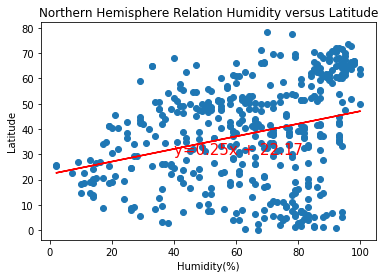

R squre value is 0.09


In [26]:
# Northern Hemisphere - Humidity (%) vs. Latitude
nor_lat = weather_df.loc[weather_df.latitude >= 0]["latitude"]
nor_hum = weather_df.loc[weather_df.latitude >= 0]["humidity"]
plt.scatter(nor_hum, nor_lat)
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Relation Humidity versus Latitude")

[slope, intercept, r_value, p_value, std_err] = st.linregress(nor_hum, nor_lat)
ligress_value = nor_hum * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(nor_hum, ligress_value, "r-")
plt.annotate(str_eq, (40, 30), color="red", fontsize="15" )
plt.savefig("./Output/northern_humidity_latitude.png")
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

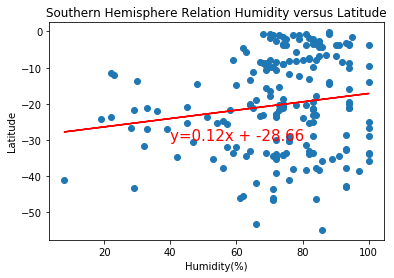

R squre value is 0.02


In [27]:
# Southern Hemisphere - Humidity (%) vs. Latitude
south_lat = weather_df.loc[weather_df.latitude < 0]["latitude"]
south_hum = weather_df.loc[weather_df.latitude < 0]["humidity"]
plt.scatter(south_hum, south_lat)
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Relation Humidity versus Latitude")

[slope, intercept, r_value, p_value, std_err] = st.linregress(south_hum, south_lat)
ligress_value = south_hum * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(south_hum, ligress_value, "r-")
plt.annotate(str_eq, (40, -30), color="red", fontsize="15" )
plt.savefig("./Output/southern_humidity_latitude.png")
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

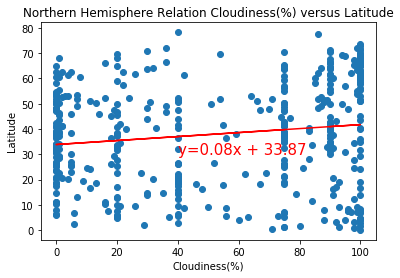

R squre value is 0.02


In [28]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
nor_lat = weather_df.loc[weather_df.latitude >= 0]["latitude"]
nor_cloud = weather_df.loc[weather_df.latitude >= 0]["cloudiness"]
plt.scatter(nor_cloud, nor_lat)
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Relation Cloudiness(%) versus Latitude")

[slope, intercept, r_value, p_value, std_err] = st.linregress(nor_cloud, nor_lat)
ligress_value = nor_cloud * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(nor_cloud, ligress_value, "r-")
plt.annotate(str_eq, (40, 30), color="red", fontsize="15" )
plt.savefig("./Output/northern_cloudiness_latitude.png")
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

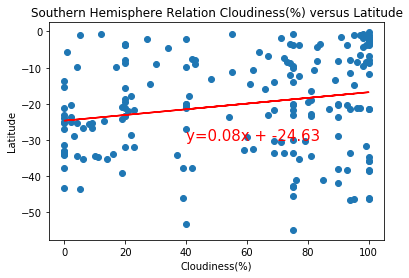

R squre value is 0.04


In [29]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
south_lat = weather_df.loc[weather_df.latitude < 0]["latitude"]
south_cloud = weather_df.loc[weather_df.latitude < 0]["cloudiness"]
plt.scatter(south_cloud, south_lat)
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Relation Cloudiness(%) versus Latitude")

[slope, intercept, r_value, p_value, std_err] = st.linregress(south_cloud, south_lat)
ligress_value = south_cloud * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(south_cloud, ligress_value, "r-")
plt.annotate(str_eq, (40, -30), color="red", fontsize="15" )
plt.savefig("./Output/southern_cloudiness_latitude.png")
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

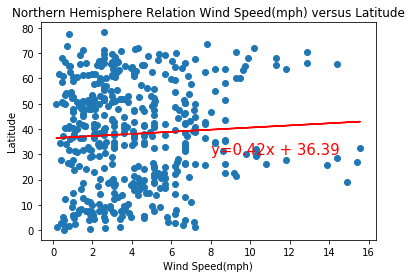

R squre value is 0.0


In [31]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
nor_lat = weather_df.loc[weather_df.latitude >= 0]["latitude"]
nor_wind = weather_df.loc[weather_df.latitude >= 0]["wind_speed"]
plt.scatter(nor_wind, nor_lat)
plt.xlabel("Wind Speed(mph)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Relation Wind Speed(mph) versus Latitude")

[slope, intercept, r_value, p_value, std_err] = st.linregress(nor_wind, nor_lat)
ligress_value = nor_wind * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(nor_wind, ligress_value, "r-")
plt.annotate(str_eq, (8, 30), color="red", fontsize="15" )
plt.savefig("./Output/northern_windspeed_latitude.png")
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

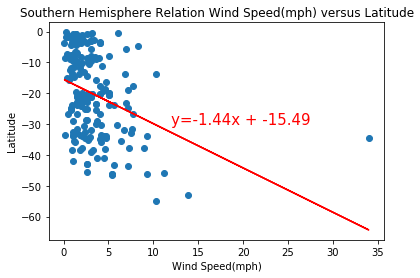

R squre value is 0.12


In [33]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
south_lat = weather_df.loc[weather_df.latitude < 0]["latitude"]
south_wind = weather_df.loc[weather_df.latitude < 0]["wind_speed"]
plt.scatter(south_wind, south_lat)
plt.xlabel("Wind Speed(mph)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Relation Wind Speed(mph) versus Latitude")

[slope, intercept, r_value, p_value, std_err] = st.linregress(south_wind, south_lat)
ligress_value = south_wind * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(south_wind, ligress_value, "r-")
plt.annotate(str_eq, (12, -30), color="red", fontsize="15" )
plt.savefig("./Output/southern_windspeed_latitude.png")
plt.show()
print(f"R squre value is {round(r_value**2,2)}")